In [1]:
import numpy as np
import pandas as pd
import re
from datetime import datetime
import json
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
video_data = "../datasets/final/cleaned_youtube_trending_with_api.csv"
youtube_video_data = pd.read_csv(video_data, quotechar='"', escapechar='\\')

In [ ]:
youtube_video_data[youtube_video_data['Top channel'] == True].shape

(9431, 13)

<Axes: >

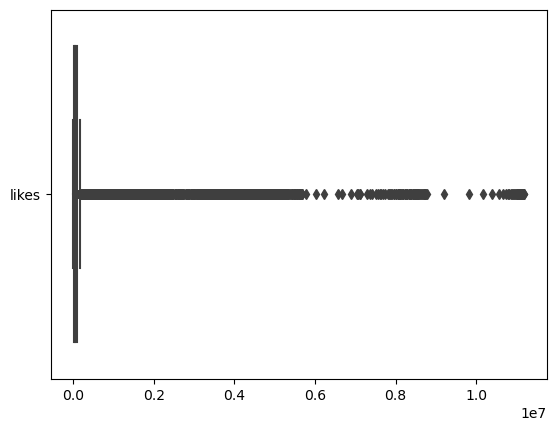

In [ ]:
sb.boxplot(data = pd.DataFrame(youtube_video_data['likes']), orient = "h")


(64743, 1)


<Axes: >

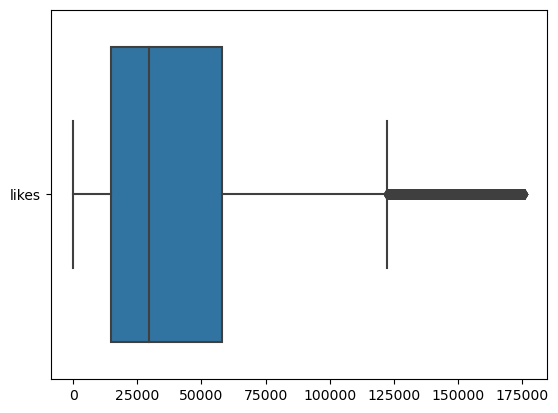

In [ ]:
# basic EDA
# sb.boxplot(data = pd.DataFrame(youtube_video_data['likes']), orient = "h")

def removeoutlier(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (series < lower_bound) | (series > upper_bound)
    clean = series[~outliers]
    return clean


# for likes
likes = youtube_video_data['likes']
likes = pd.DataFrame(removeoutlier(likes))
print(likes.shape)
sb.boxplot(data = likes, orient = "h")

<Axes: >

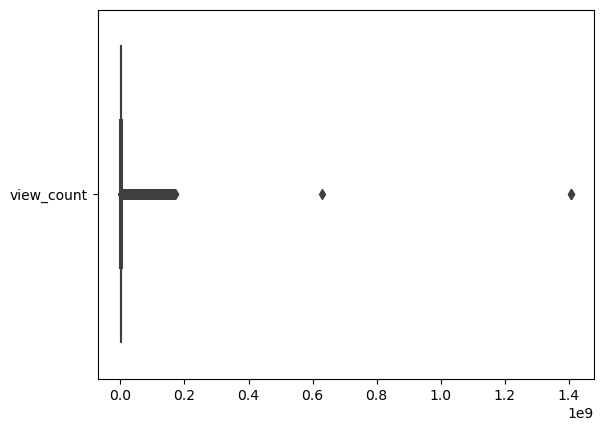

In [ ]:
# for views
sb.boxplot(data = pd.DataFrame(youtube_video_data['view_count']), orient = "h")


<Axes: >

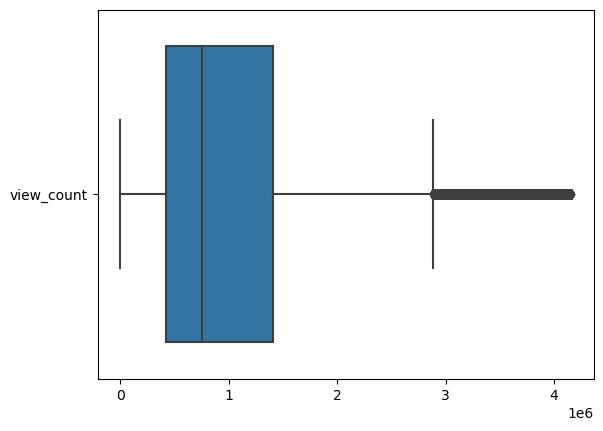

In [ ]:
views = youtube_video_data['view_count']
views = pd.DataFrame(removeoutlier(views))
sb.boxplot(data = views, orient = "h")

<Axes: >

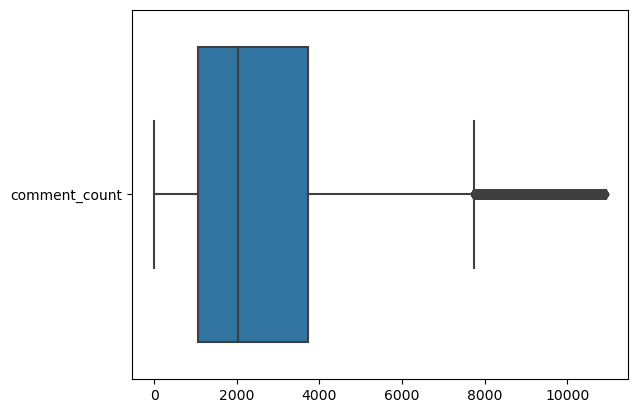

In [ ]:
# comments
comments = youtube_video_data['comment_count']
comments = pd.DataFrame(removeoutlier(comments))
sb.boxplot(data = comments, orient = "h")

In [ ]:
# category "rank"
youtube_video_data['category'].value_counts()

Gaming                   14774
Entertainment            14690
Music                    11415
Sports                    9461
People & Blogs            5597
Film & Animation          3169
Comedy                    2866
News & Politics           2293
Science & Technology      2243
Education                 1861
Howto & Style             1769
Autos & Vehicles          1704
Travel & Events            613
Pets & Animals             336
Nonprofits & Activism        6
Name: category, dtype: int64

<Axes: >

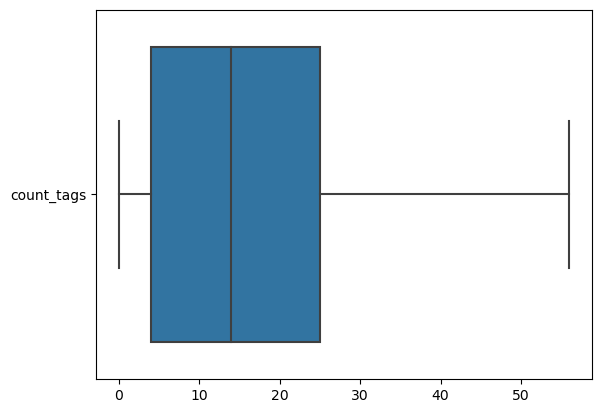

In [ ]:
# count tags
tags = youtube_video_data['count_tags']
tags = pd.DataFrame(removeoutlier(tags))
sb.boxplot(data = tags, orient = "h")

In [ ]:
youtube_video_data['category'].value_counts()